In [1]:
%matplotlib inline
import data_describe as dd
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import datetime as dt
import sklearn
import pickle
import copy
import missingno as msno

from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn import metrics 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor




from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

from datetime import datetime

In [2]:
data=pd.read_csv('C:/Users/herry/Desktop/Data eng/finalproject/Clean Incident Dataset.csv',encoding='ISO-8859-1')

In [3]:
data

,Incident_Date,Aircaft_Model,Aircaft_Operator,Incident_Location,Aircaft_Damage_Type,Fatalities,Aircraft_Phase,Departure_Country,Destination_Country,Flight_Type,Occupants,Incident_Type,Incident_Damage
0,05-JAN-2022,Boeing 737,Caspian Airlines,Isfahan-Shah...,Substantial,0,Landing (LDG),Iran,Iran,Domestic,116.0,Accident,repairable-damage
1,09-JAN-2021,Boeing 737,Sriwijaya Air,near Jakarta-Soek...,Destroyed,62,En route (ENR),Indonesia,Indonesia,Domestic,62.0,Accident,hull-loss
2,18-MAR-2021,Airbus A320,Viva Aerobus,Puerto Valla...,Substantial,0,Taxi (TXI),Mexico,Mexico,Domestic,127.0,Accident,repairable-damage
3,11-JUL-2021,Airbus A320,Condor Flugdienst,Kavala-Megas...,Substantial,0,Takeoff (TOF),Greece,Germany,International,80.0,Accident,repairable-damage
4,23-SEP-2021,Airbus A321,Hawaiian Airlines,Honolulu-Dan...,Substantial,0,Landing (LDG),United States of America,United States of America,Domestic,134.0,Accident,repairable-damage
...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,31-MAR-1975,Boeing 737,Western Air Lines,Casper Airpo...,Damaged beyond repair,0,Landing (LDG),United States of America,United States of America,Domestic,99.0,Accident,hull-loss
481,31-MAY-1973,Boeing 737,Indian Airlines,near Delhi-Indira...,Destroyed,48,Approach (APR),India,India,Domestic,65.0,Accident,hull-loss
482,28-OCT-1973,Boeing 737,Piedmont Airlines,Greensboro/H...,Substantial,0,Landing (LDG),United States of America,United States of America,Domestic,96.0,Accident,repairable-damage
483,08-DEC-1972,Boeing 737,United Airlines,near Chicago-Midw...,Damaged beyond repair,45,Approach (APR),United States of America,United States of America,Domestic,61.0,Accident,hull-loss


In [4]:
data.dtypes

Incident_Date           object
Aircaft_Model           object
Aircaft_Operator        object
Incident_Location       object
Aircaft_Damage_Type     object
Fatalities               int64
Aircraft_Phase          object
Departure_Country       object
Destination_Country     object
Flight_Type             object
Occupants              float64
Incident_Type           object
Incident_Damage         object
dtype: object

In [5]:
data['Incident_Type'] = data['Incident_Type'].replace("Criminal occurrence (sabotage, shoot down)", "Criminal occurrence")

# Check unique values after replacement
unique_values_after = data['Incident_Type'].unique()
print("Unique values after replacement:", unique_values_after)

Unique values after replacement: ['Accident ' 'Criminal occurrence (sabotage, shoot down) ' 'Incident '
 'Hijacking ']


In [6]:
data

,Incident_Date,Aircaft_Model,Aircaft_Operator,Incident_Location,Aircaft_Damage_Type,Fatalities,Aircraft_Phase,Departure_Country,Destination_Country,Flight_Type,Occupants,Incident_Type,Incident_Damage
0,05-JAN-2022,Boeing 737,Caspian Airlines,Isfahan-Shah...,Substantial,0,Landing (LDG),Iran,Iran,Domestic,116.0,Accident,repairable-damage
1,09-JAN-2021,Boeing 737,Sriwijaya Air,near Jakarta-Soek...,Destroyed,62,En route (ENR),Indonesia,Indonesia,Domestic,62.0,Accident,hull-loss
2,18-MAR-2021,Airbus A320,Viva Aerobus,Puerto Valla...,Substantial,0,Taxi (TXI),Mexico,Mexico,Domestic,127.0,Accident,repairable-damage
3,11-JUL-2021,Airbus A320,Condor Flugdienst,Kavala-Megas...,Substantial,0,Takeoff (TOF),Greece,Germany,International,80.0,Accident,repairable-damage
4,23-SEP-2021,Airbus A321,Hawaiian Airlines,Honolulu-Dan...,Substantial,0,Landing (LDG),United States of America,United States of America,Domestic,134.0,Accident,repairable-damage
...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,31-MAR-1975,Boeing 737,Western Air Lines,Casper Airpo...,Damaged beyond repair,0,Landing (LDG),United States of America,United States of America,Domestic,99.0,Accident,hull-loss
481,31-MAY-1973,Boeing 737,Indian Airlines,near Delhi-Indira...,Destroyed,48,Approach (APR),India,India,Domestic,65.0,Accident,hull-loss
482,28-OCT-1973,Boeing 737,Piedmont Airlines,Greensboro/H...,Substantial,0,Landing (LDG),United States of America,United States of America,Domestic,96.0,Accident,repairable-damage
483,08-DEC-1972,Boeing 737,United Airlines,near Chicago-Midw...,Damaged beyond repair,45,Approach (APR),United States of America,United States of America,Domestic,61.0,Accident,hull-loss


In [7]:
unique_incident = data['Incident_Type'].unique()
print(unique_incident)

['Accident ' 'Criminal occurrence (sabotage, shoot down) ' 'Incident '
 'Hijacking ']


In [8]:
incident_counts = data['Incident_Type'].value_counts()
print(incident_counts)

Accident                                       456
Criminal occurrence (sabotage, shoot down)      14
Hijacking                                       12
Incident                                         3
Name: Incident_Type, dtype: int64


<Axes: >

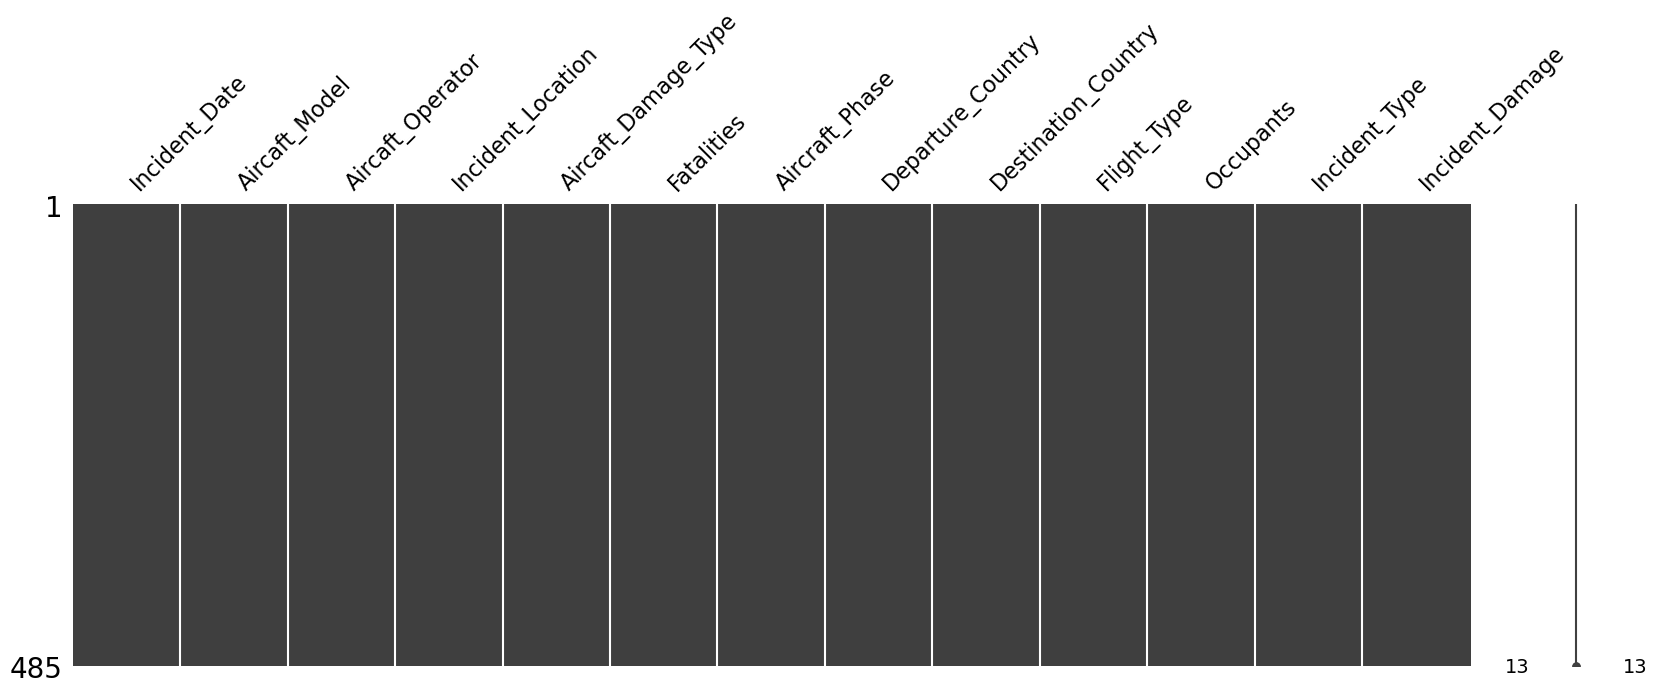

In [9]:
msno.matrix(data,figsize = (20,6))

In [42]:
columns_to_drop = ['Incident_Location','Incident_Damage']
# columns_to_drop = ['Aircaft_Damage_Type', 'Incident_Damage','Incident_Location']
Important_attributes = data.drop(columns_to_drop,axis=1)

Text(0.5, 1.0, 'Feature Importance')

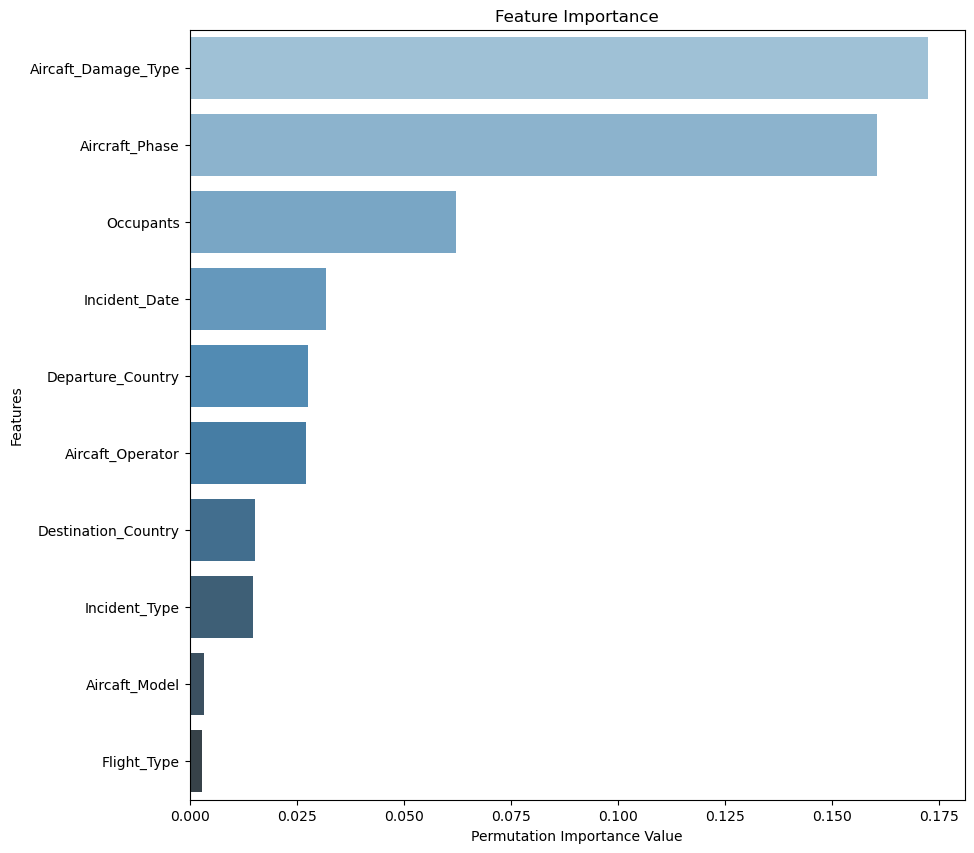

In [43]:
dd.importance(Important_attributes, 'Fatalities')

In [14]:
incident_counts = data['Aircaft_Model'].value_counts()
print(incident_counts)

Boeing 737             301
Airbus A320             62
Boeing 767              40
Airbus A321             30
Cessna 208 Caravan      19
Boeing 777              16
Airbus A319             14
Sukhoi Superjet 100      2
Bombardier CRJ           1
Name: Aircaft_Model, dtype: int64


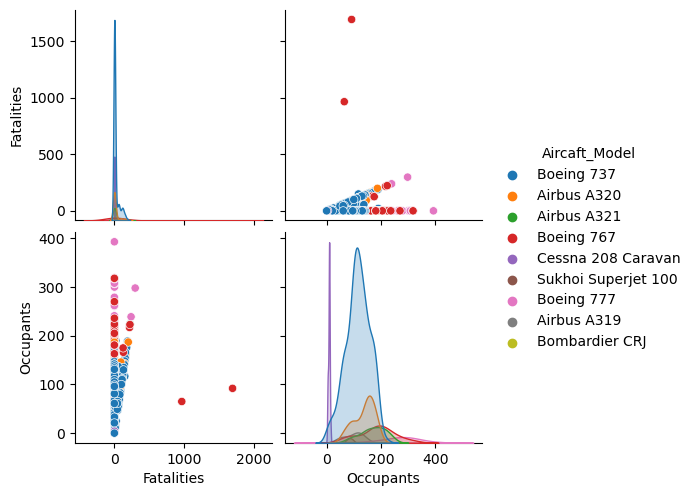

In [49]:
sns.pairplot(data=data, hue="Aircaft_Model")